In [53]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from tensorflow.keras.utils import to_categorical # one-hot keras encording
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

## 1. 데이터 읽어오기

In [6]:
df = pd.read_csv('C:/Users/user/ILIFO/DeepLearning/deeplearning_class-master/dataset/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## 2. 데이터 전처리

In [7]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [8]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [9]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [15]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3)

## 3. 모델 설계

In [61]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 4. 모델 컴파일

In [62]:
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

## 5. 학습

In [18]:
h= model.fit(x_train,y_train,epochs=200,batch_size=200)

Epoch 1/200
23/23 [==============================] - 0s 2ms/step - loss: 0.7452 - accuracy: 0.7370
Epoch 2/200
23/23 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8592
Epoch 3/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.9210
Epoch 4/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9283
Epoch 5/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2247 - accuracy: 0.9296
Epoch 6/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2183 - accuracy: 0.9294
Epoch 7/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9309
Epoch 8/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9316
Epoch 9/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9340
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9342
Epoch 11/

In [63]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

h = model.fit(X, Y, validation_split= 0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 3.40350, saving model to ./model/01-3.4035.hdf5

Epoch 00002: val_loss improved from 3.40350 to 0.37456, saving model to ./model/02-0.3746.hdf5

Epoch 00003: val_loss did not improve from 0.37456

Epoch 00004: val_loss improved from 0.37456 to 0.32694, saving model to ./model/04-0.3269.hdf5

Epoch 00005: val_loss improved from 0.32694 to 0.27093, saving model to ./model/05-0.2709.hdf5

Epoch 00006: val_loss improved from 0.27093 to 0.24885, saving model to ./model/06-0.2488.hdf5

Epoch 00007: val_loss improved from 0.24885 to 0.23225, saving model to ./model/07-0.2323.hdf5

Epoch 00008: val_loss improved from 0.23225 to 0.22597, saving model to ./model/08-0.2260.hdf5

Epoch 00009: val_loss improved from 0.22597 to 0.22258, saving model to ./model/09-0.2226.hdf5

Epoch 00010: val_loss improved from 0.22258 to 0.21937, saving model to ./model/10-0.2194.hdf5

Epoch 00011: val_loss improved from 0.21937 to 0.21697, saving model to ./model/11-0.21

In [60]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
h= model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2000,batch_size=200,callbacks=[early_stopping_callback])

Epoch 1/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0549 - val_accuracy: 0.9862
Epoch 2/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9842 - val_loss: 0.0563 - val_accuracy: 0.9851
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0573 - val_accuracy: 0.9846
Epoch 4/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9828 - val_loss: 0.0553 - val_accuracy: 0.9862
Epoch 5/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0522 - accuracy: 0.9826 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 6/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.0606 - val_accuracy: 0.9831
Epoch 7/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9842 - val_loss: 0.0567 - val_accuracy: 0.9851
Epoch 

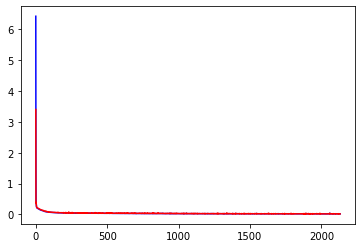

In [64]:
# Validation Loss 보다 Loss가 낮아야 하지 않나??
plt.plot(h.history['loss'],'b')
plt.plot(h.history['val_loss'],'r')
plt.show()

In [65]:
h.history['accuracy'][-1]

0.9963060021400452